# Models with Synthetic Data

Trains models on synthetic data .

In [3]:
import sys
sys.path.append('../..')


In [4]:
import tensorflow as tf
from numpy import arange
import tensorflow_datasets as tfds
from model_compra_comigo.data_handler.data_simulator import DataSimulator
from model_compra_comigo.data_handler.data_handler import DataHandler


In [5]:
data_simulator = DataSimulator()
data_handler = DataHandler()


## Generate a Dataset

In [6]:
data_simulator = DataSimulator()
time_range = 365*6
split = 365
time_data = arange(time_range)

series, parameters = data_simulator.generate(
    time_range = time_range,
)

labels=[(f"trend_slope = {parameters['trend_slope']}\n"
         f"seasonality_period = {parameters['seasonality_period']}\n"
         f"seasonality_amplitude = {parameters['seasonality_amplitude']}\n"
         f"seasonality_phase = {parameters['seasonality_phase']}\n"
         f"seasonality_time_threshold = {parameters['seasonality_time_threshold']}\n"
         f"seasonality_ncos = {parameters['seasonality_ncos']}\n"
         f"seasonality_nexp = {parameters['seasonality_nexp']}\n"
         f"noise_scaling_factor = {parameters['noise_scaling_factor']}\n"
         f"autocorrelation_amplitude = {parameters['autocorrelation_amplitude']}\n"
         f"autocorrelation_phi = {parameters['autocorrelation_phi']}"
        )]

data_simulator.plot_series(
    time=time_data,
    series=series,
    labels=labels
)


AttributeError: 'DataSimulator' object has no attribute 'plot_series'

In [7]:
from io import BytesIO
from typing import List, Optional, Tuple, Dict, Any, Union
from matplotlib.pyplot import figure, grid, legend, plot, show, xlabel, ylabel, savefig
from numpy import arange, cos, exp, ndarray, pi, where
from numpy.random import RandomState, sample
from PIL import Image, PngImagePlugin


def plot_series(
    series: Union[Tuple[ndarray, ndarray], List[Tuple[ndarray, ndarray]]],
    pformat: str = "-",
    labels: Optional[Tuple[str, str]] = None,
    plt_labels: Optional[List[str]] = None,
    figsize: Tuple[int] = (12, 8),
    fontsize: int = 12,
    do_show: bool = True
) -> PngImagePlugin.PngImageFile:
    """
    Visualizes time series data

    Parameters
    ----------
    series : Union[Tuple[ndarray, ndarray], List[Tuple[ndarray, ndarray]]]
        Time series values for each time step .
    pformat : str
        Plot format .
    plt_labels : Optional[Tuple[str, str]]
        Labels for the plot. Defaults to None .
    labels: Optional[Tuple[str, str]]
        Labels for the lines. Defaults to None .
    figsize : Tuple[int]
        Size of the figure. Defaults to (12, 8) .
    fontsize : int
        Size of the figure font. Defaults to 12 .
    do_show: bool
        Whether to show or not .

    Returns
    -------
    PngImagePlugin.PngImageFile
        PIL image .

    """
    # Creates plot with time series data
    figure(figsize=figsize)
    if type(series) is list:
        for i, series_num in enumerate(series):
            plot(series_num[0], series_num[1], pformat)
    else:
        plot(series[0], series[1], pformat)
    if labels and (len(labels) > 0):
        legend(fontsize=fontsize, labels=labels)

    # Labels for the axis
    if labels:
        xlabel(plt_labels[0])
        ylabel(plt_labels[1])
    else:
        xlabel("Time")
        ylabel("Value")

    grid(True)

    buf = BytesIO()
    savefig(buf)
    buf.seek(0)
    im = Image.open(buf)

    # Shows plot
    if do_show:
        show()
    # Returns image
    return im


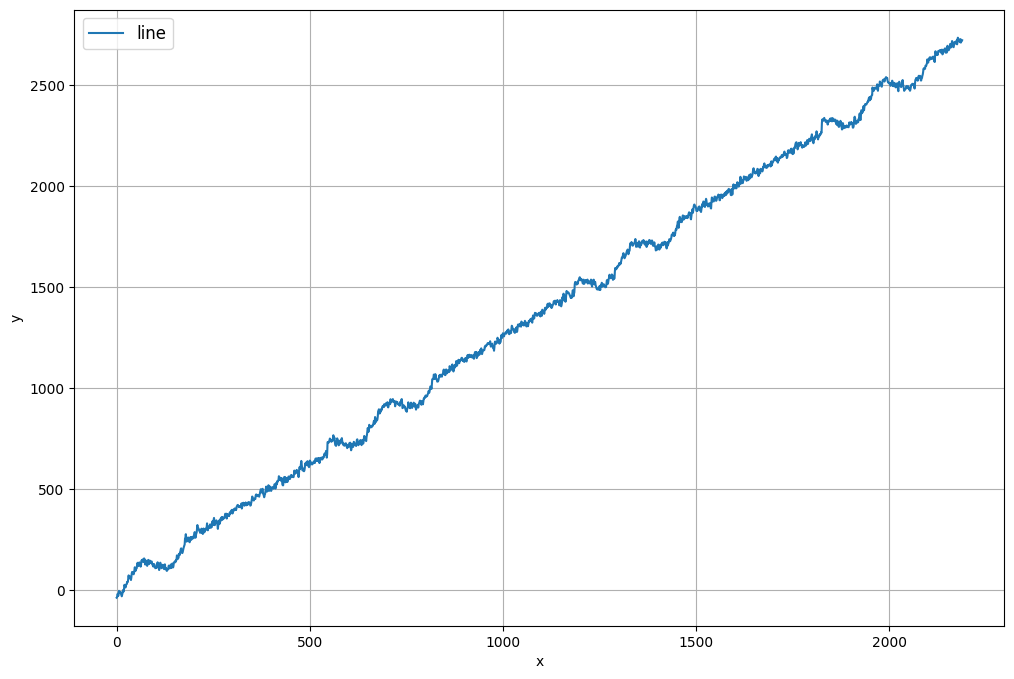

In [8]:
image = plot_series(
    series = (time_data, series),
    plt_labels = ["x", "y"],
    labels = ["line"],
)


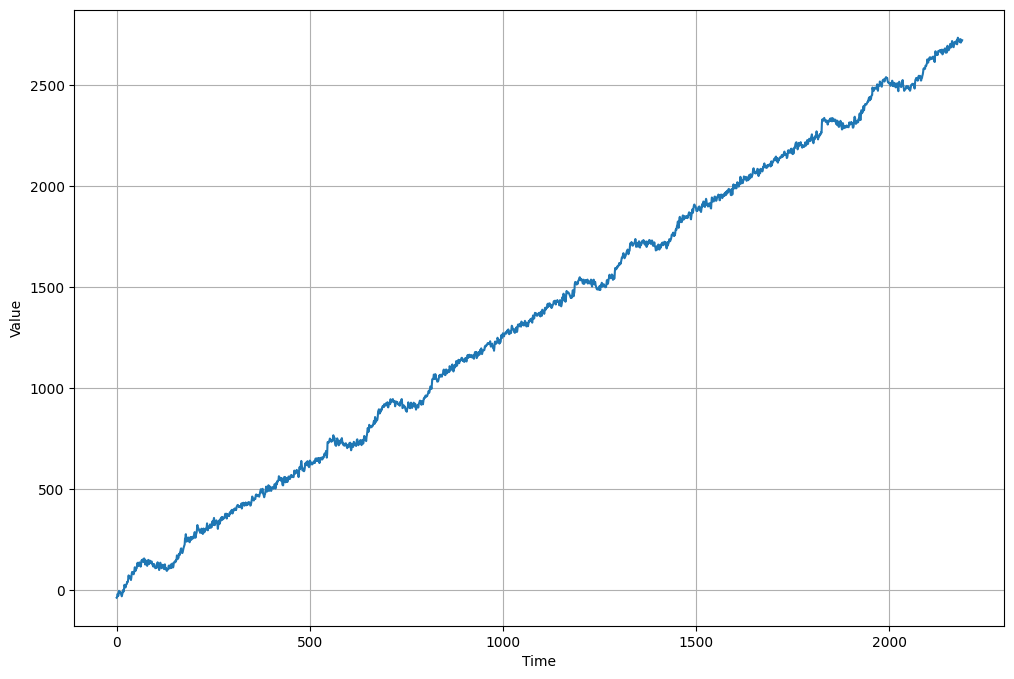

In [9]:
image = plot_series(
    series = (time_data, series),
    plt_labels = ["x", "y"],
)


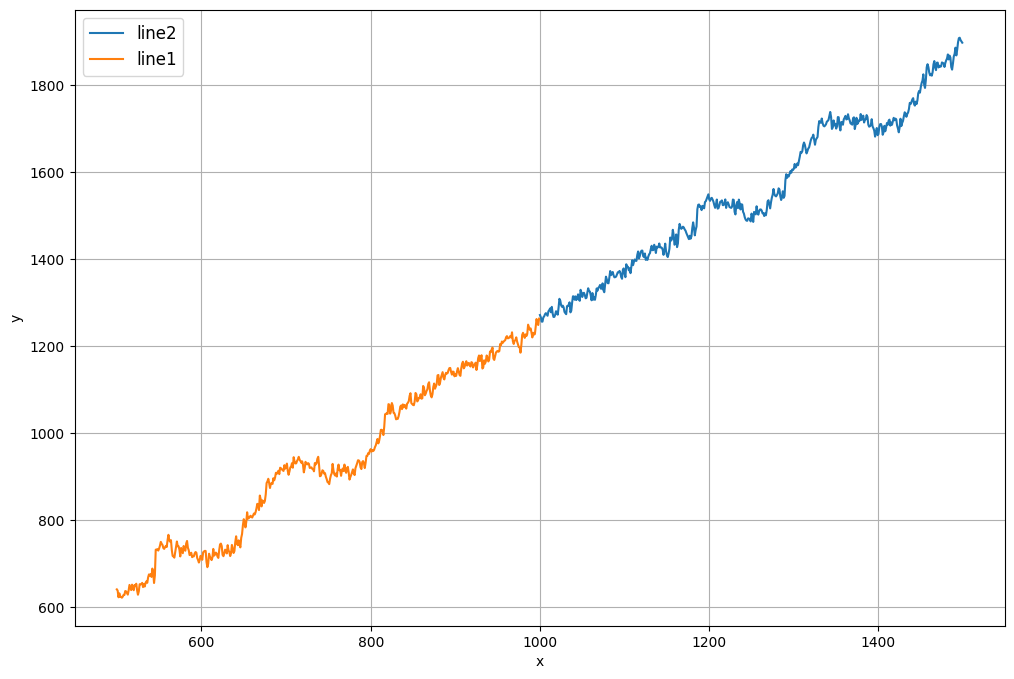

In [10]:
image = plot_series(
    series = [(time_data[1000:1500], series[1000:1500]), (time_data[500:1000], series[500:1000]),],
    plt_labels = ["x", "y"],
    labels = ["line2", "line1"],
)


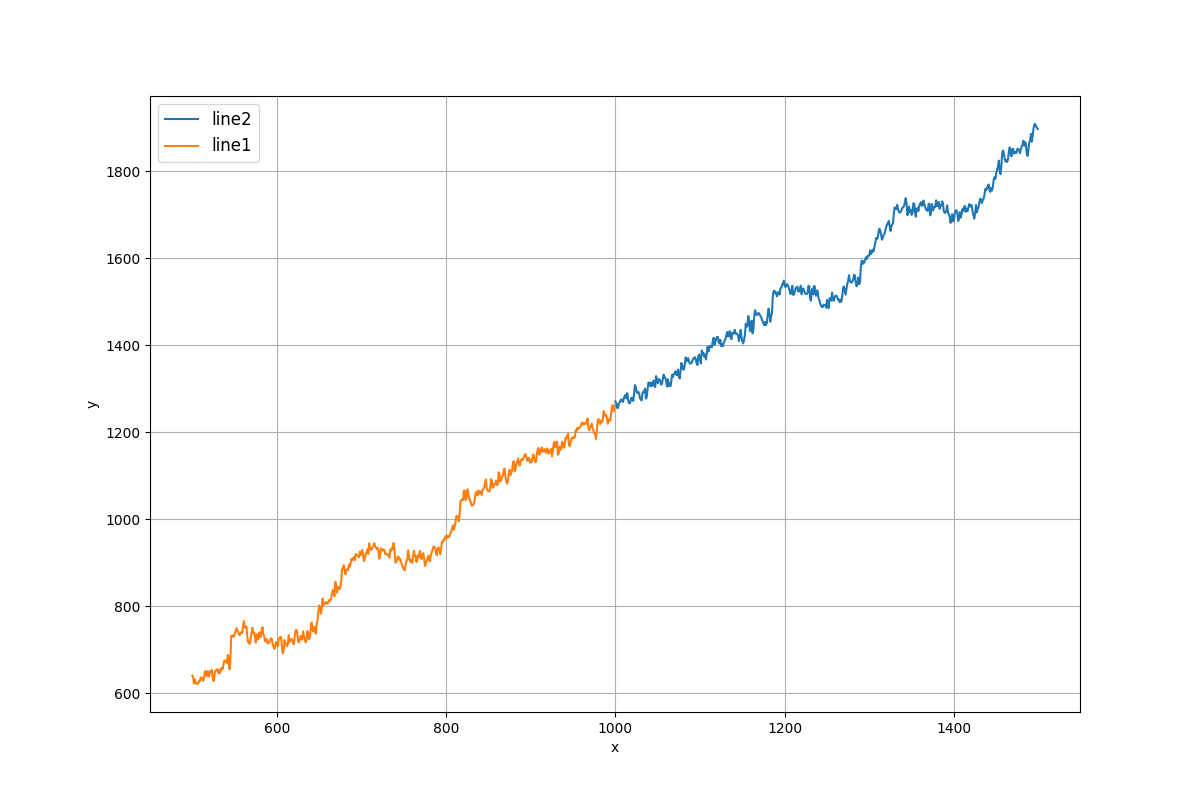

In [11]:
image

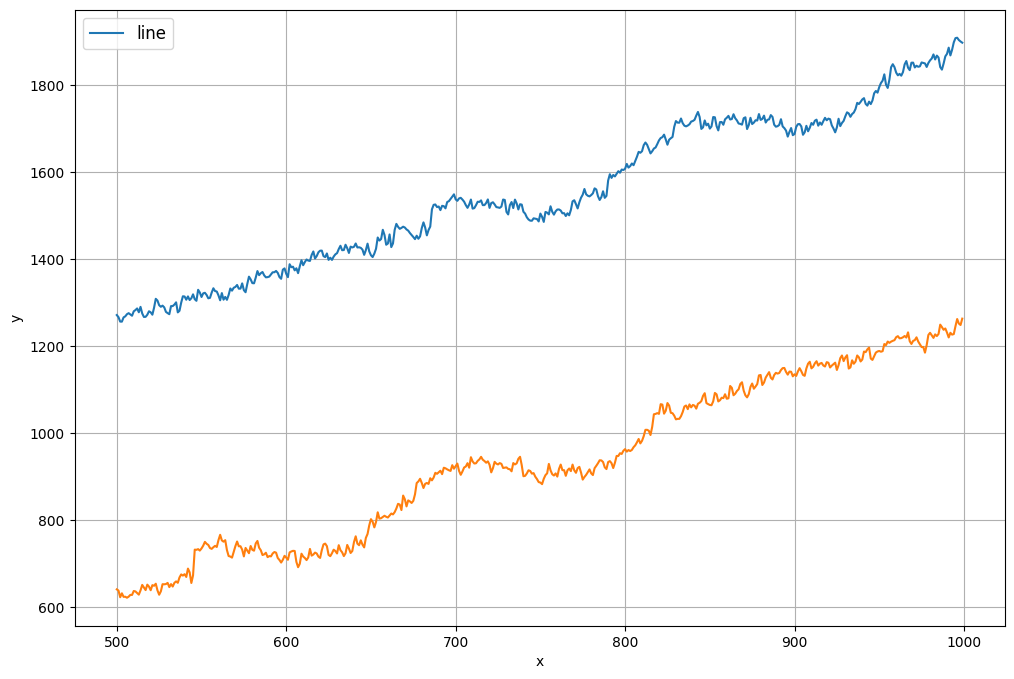

In [12]:
image = plot_series(
    series = [(time_data[500:1000], series[1000:1500]), (time_data[500:1000], series[500:1000]),],
    plt_labels = ["x", "y"],
    labels = ["line"],
)